# Glass Clustering Example
v1.0.0.1

## Import libraries

In [1]:
# Import NumPy and Pandas
import numpy as np
import pandas as pd

# Import sklearn libraries
from sklearn import preprocessing
from sklearn import decomposition
from sklearn import metrics
from sklearn import neighbors
from sklearn import cluster

# Import MatPlotLib for plotting
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Load Dataset

Dataset source:
https://archive.ics.uci.edu/ml/datasets/glass+identification

Dataset Creator:
B. German
Central Research Establishment
Home Office Forensic Science Service
Aldermaston, Reading, Berkshire RG7 4PN

Dataset Donor:
Vina Spiehler, Ph.D., DABFT
Diagnostic Products Corporation
(213) 776-0180 (ext 3014)

Dataset Paper:
Ian W. Evett and Ernest J. Spiehler. Rule Induction in Forensic Science


Broken glass fragments can be very small and lodge in shoes, clothing, hair or skin. Gathering glass fragments from a crime scene can be valuable in determining end-use or connecting people and objects to places. For example, windshields have a different color and composition than a drinking glass or a lead crystal vase, so glass fragments on an individual’s clothing could be compared to those collected at a hit-and-run scene to determine if that individual was present.

![glass trace evidence](http://www.fosterfreeman.com/images/stories/products/TRACE/GLASS.jpg) image credit: fosterfreeman

### Attributes
* Id number: 1 to 214
* RI: refractive index
* Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
* Mg: Magnesium
* Al: Aluminum
* Si: Silicon
* K: Potassium
* Ca: Calcium
* Ba: Barium
* Fe: Iron

### Class

Type of glass: (class attribute)

#### (1)
 * building_windows_float_processed
 * building_windows_non_float_processed
 * vehicle_windows_float_processed

#### (2)
 * containers
 * tableware
 * headlamps

In [2]:
# Load data from input file
df = pd.read_csv("glass.data")

# Extract labels
labels = df['Type']

# Remove ID column
df = df.drop(['Id'], axis=1)

# Remove class column, we pretending we do not have this for this example
df = df.drop(['Type'], axis=1)

# Display the top rows of data
df.head(10)

RI     Na    Mg    Al     Si     K    Ca   Ba    Fe
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.00
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.00
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.00
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.00
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.00
5  1.51596  12.79  3.61  1.62  72.97  0.64  8.07  0.0  0.26
6  1.51743  13.30  3.60  1.14  73.09  0.58  8.17  0.0  0.00
7  1.51756  13.15  3.61  1.05  73.24  0.57  8.24  0.0  0.00
8  1.51918  14.04  3.58  1.37  72.08  0.56  8.30  0.0  0.00
9  1.51755  13.00  3.60  1.36  72.99  0.57  8.40  0.0  0.11

## Normalise the Data

In [3]:
# Normalise the data
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(df)
df = pd.DataFrame(np_scaled, columns=df.columns)

# Display the data
df.describe()

RI          Na          Mg          Al          Si           K  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     0.316744    0.402684    0.597891    0.359784    0.507310    0.080041   
std      0.133313    0.122798    0.321249    0.155536    0.138312    0.105023   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.235843    0.327444    0.471047    0.280374    0.441071    0.019726   
50%      0.286655    0.386466    0.775056    0.333333    0.532143    0.089372   
75%      0.351514    0.465414    0.801782    0.417445    0.585268    0.098229   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

               Ca          Ba          Fe  
count  214.000000  214.000000  214.000000  
mean     0.327785    0.055570    0.111783  
std      0.132263    0.157847    0.191056  
min      0.000000    0.000000    0.000000  
25%      0.261152    0.000000    0.000000  
50%      0.294610    0.000000    0.000000  
75%      0.347816    0.000000    0.196078  
max      1.000000    1.000000    1.000000

## Reducing the Dimmensionality

[0.45429569 0.17990097 0.12649459]


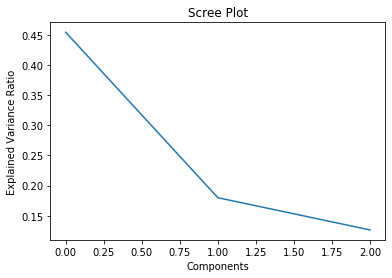

[[ 0.03420952  0.11044243 -0.90903503  0.24901968  0.05079549 -0.00269769
   0.14094732  0.26682812 -0.06801349]
 [ 0.51327262 -0.19867029 -0.11710045 -0.34736315 -0.21642569 -0.12930091
   0.50234458 -0.16429176  0.46883578]
 [-0.23131525 -0.08910698  0.02972865  0.34427771  0.00520515  0.16635716
  -0.23187356  0.18355983  0.8390357 ]]


In [4]:
# Number of principle components, dimmensions to reduce to
pca = decomposition.PCA(n_components=3)

# Find the principle components, using the covarience matrix, eigen vectors 
pca_model = pca.fit(df)

# Percentage of variance explained for each components
print(pca.explained_variance_ratio_)

# Plot the scree plot
plt.plot(pca.explained_variance_ratio_)
plt.title("Scree Plot")
plt.xlabel("Components")
plt.ylabel("Explained Variance Ratio")
plt.show()

# Components, these the values that each cell is multipled across each of the 
# original dimmensions to produce the new dimmension, (sub-space) 
print(pca_model.components_)

# Transform the data
pca_array = pca_model.transform(df)

# Data frames are easier to work with than arrays
df = pd.DataFrame(data=pca_array, columns=['PC0','PC1','PC2'])

## Visualising the Data

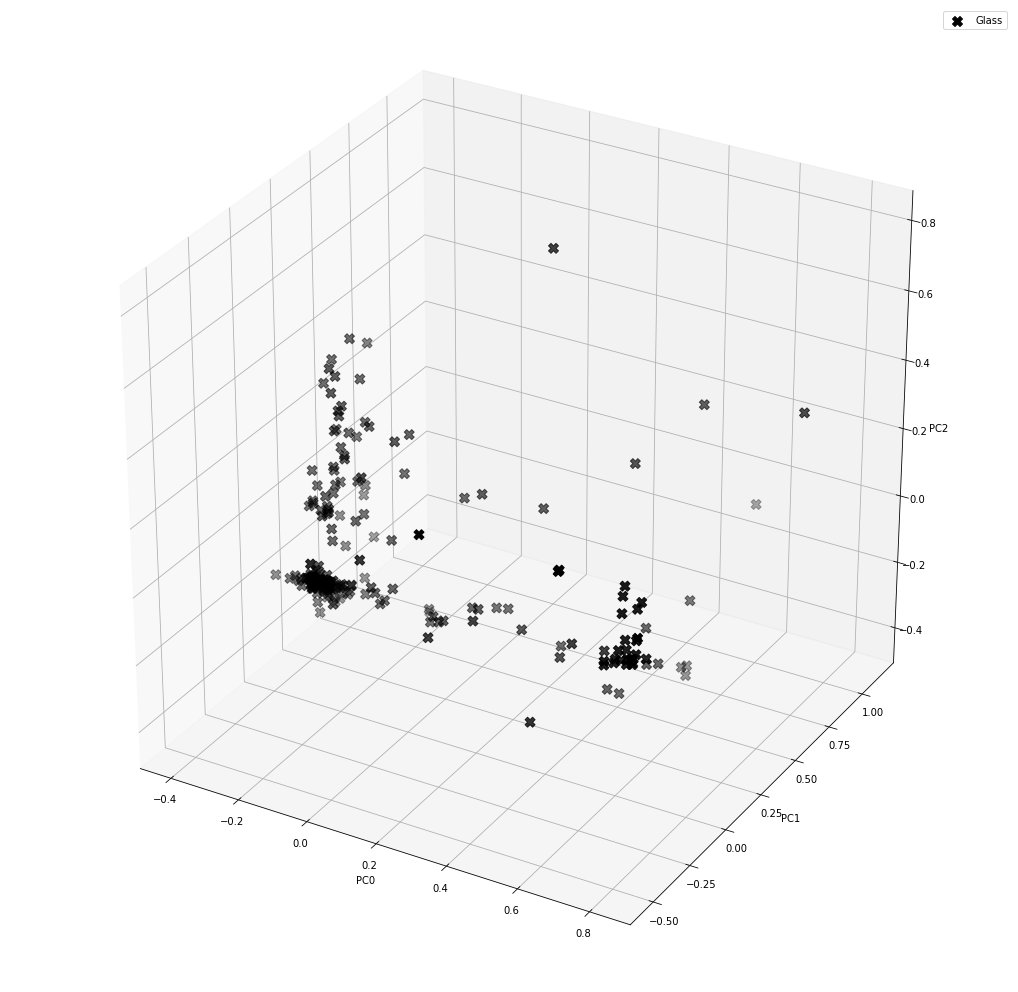

In [5]:
fig = plt.figure(figsize=(18, 18))
ax1 = fig.add_subplot(1,1,1, projection='3d')
ax1.scatter(df['PC0'], df['PC1'], df['PC2'], c='k', marker='X', s=100, label='Glass')
ax1.set_xlabel('PC0')
ax1.set_ylabel('PC1')
ax1.set_zlabel('PC2')
ax1.legend()
plt.show()

## Removing Outliers

In [6]:
# Remove the outliers using the LOF Algorithm
clf = neighbors.LocalOutlierFactor(n_neighbors=20, contamination=0.2)

# Prediction of which instances are outliers
y_pred = clf.fit_predict(df)

print('Instance count before LOF: ' + str(len(df)))

# Remove the outlying instances
df = df[y_pred != -1]

print('Instance count after LOF: ' + str(len(df)))

Instance count before LOF: 214
Instance count after LOF: 171


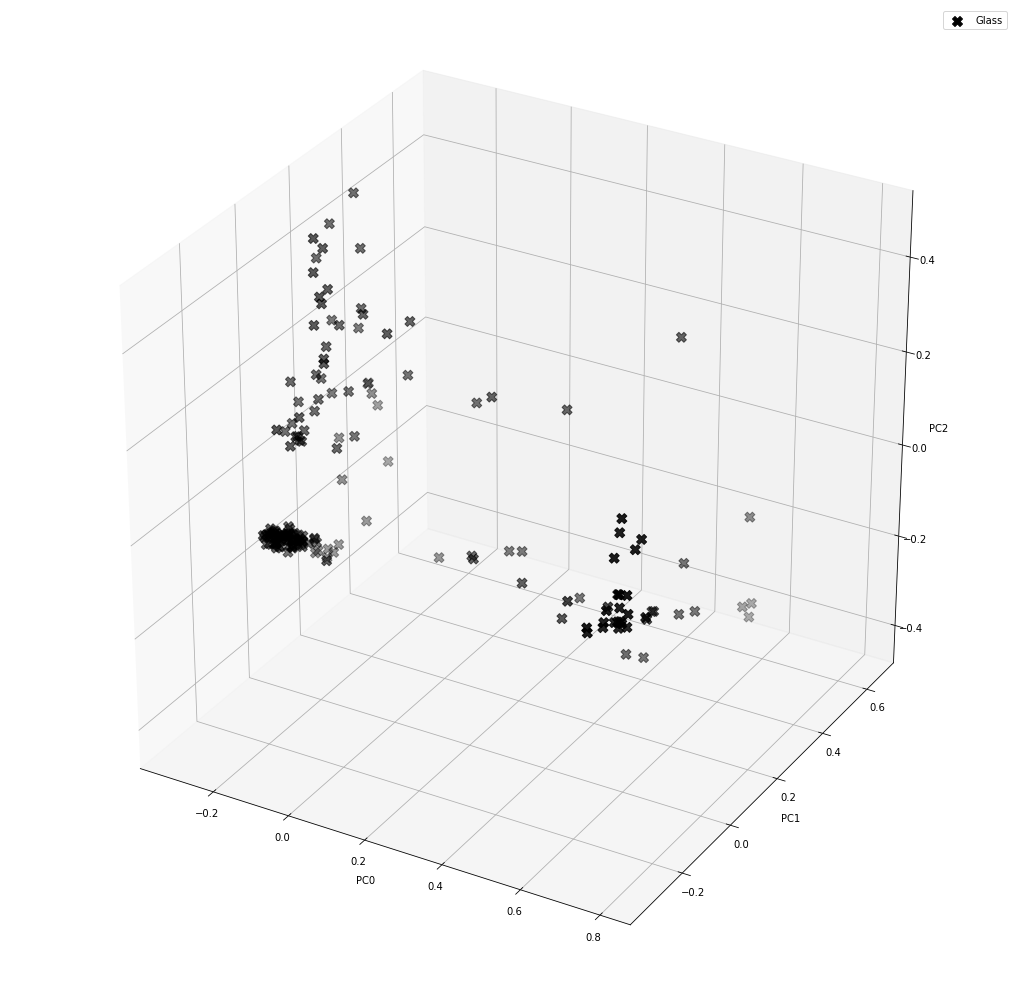

In [7]:
fig = plt.figure(figsize=(18, 18))
ax1 = fig.add_subplot(1,1,1, projection='3d')
ax1.scatter(df['PC0'], df['PC1'], df['PC2'], c='k', marker='X', s=100, label='Glass')
ax1.set_xlabel('PC0')
ax1.set_ylabel('PC1')
ax1.set_zlabel('PC2')
ax1.legend()
plt.show()

## Clustering

In [8]:
kmeans = cluster.KMeans(n_clusters=2).fit(df)
print(kmeans.cluster_centers_)

[[-0.2035213  -0.00107888  0.01806297]
 [ 0.60002061  0.01088268 -0.04875647]]


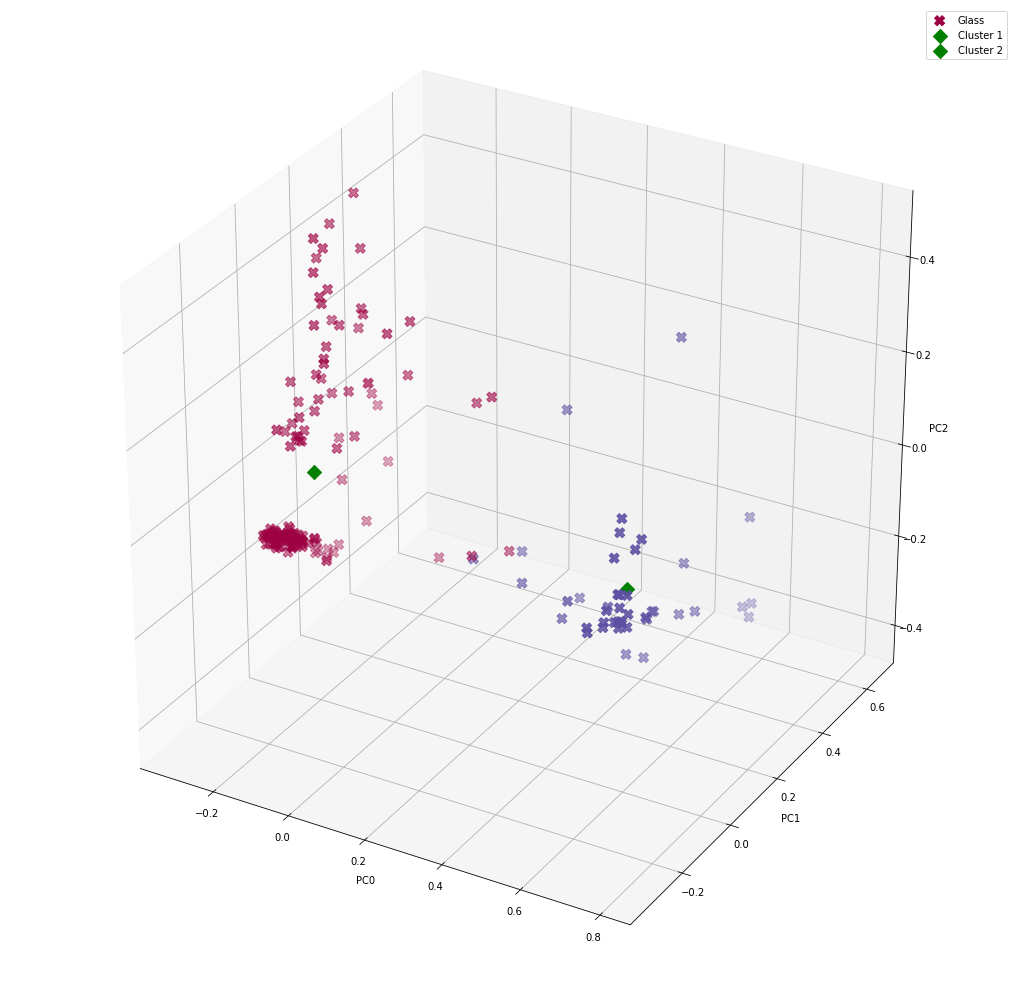

In [9]:
fig = plt.figure(figsize=(18, 18))
ax1 = fig.add_subplot(1,1,1, projection='3d')
ax1.scatter(df['PC0'], df['PC1'], df['PC2'], c=kmeans.labels_, cmap='Spectral', marker='X', s=100, label='Glass')
ax1.scatter( kmeans.cluster_centers_[0][0], kmeans.cluster_centers_[0][1], kmeans.cluster_centers_[0][2], c='g', marker='D', s=100, label='Cluster 1')
ax1.scatter( kmeans.cluster_centers_[1][0], kmeans.cluster_centers_[1][1], kmeans.cluster_centers_[1][2], c='g', marker='D', s=100, label='Cluster 2')
ax1.set_xlabel('PC0')
ax1.set_ylabel('PC1')
ax1.set_zlabel('PC2')
ax1.legend()
plt.show()

## Predicting New Instances - Indentifying the Suspects

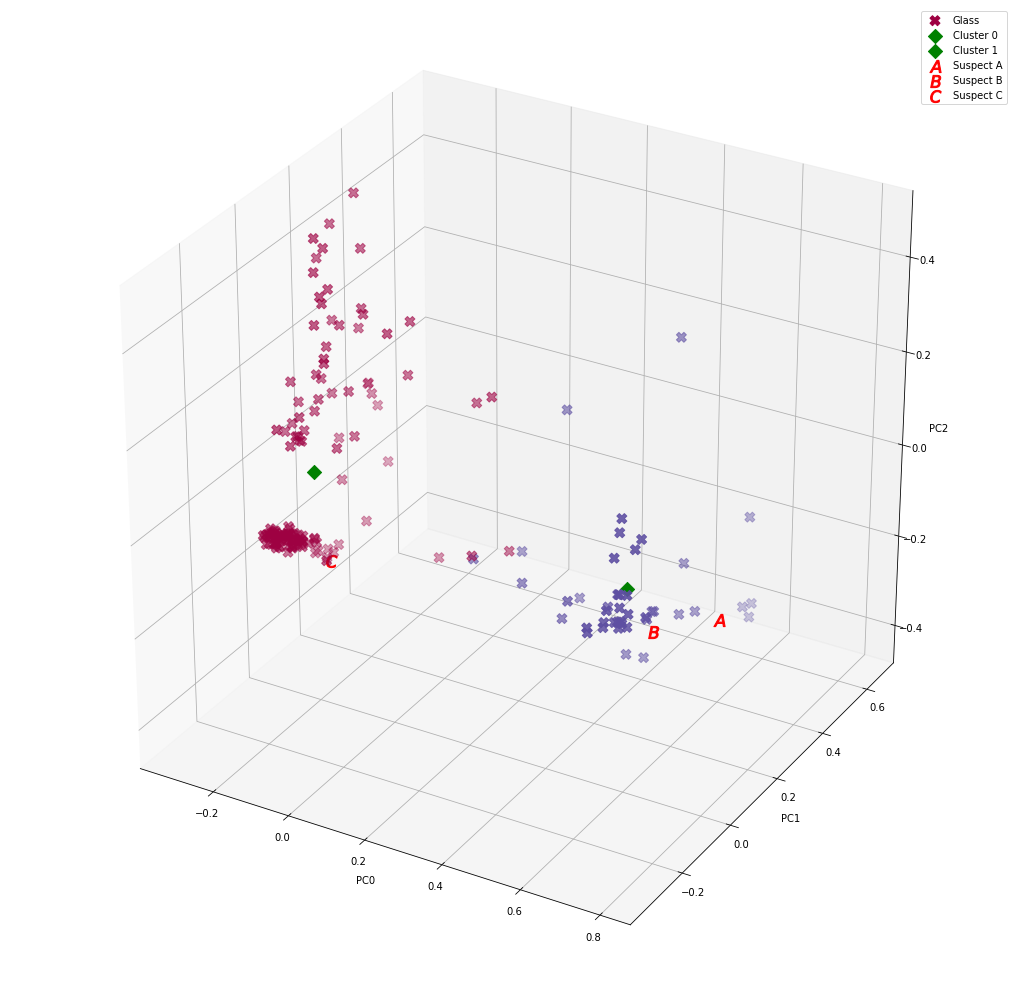

In [12]:
fig = plt.figure(figsize=(18, 18))
ax1 = fig.add_subplot(1,1,1, projection='3d')
ax1.scatter(df['PC0'], df['PC1'], df['PC2'], c=kmeans.labels_, cmap='Spectral', marker='X', s=100, label='Glass')
ax1.scatter( kmeans.cluster_centers_[0][0], kmeans.cluster_centers_[0][1], kmeans.cluster_centers_[0][2], c='g', marker='D', s=100, label='Cluster 0')
ax1.scatter( kmeans.cluster_centers_[1][0], kmeans.cluster_centers_[1][1], kmeans.cluster_centers_[1][2], c='g', marker='D', s=100, label='Cluster 1')
ax1.scatter( 0.6, 0.4, -0.3, c='r', marker='$A$', s=150, label='Suspect A')
ax1.scatter( 0.4, 0.45, -0.4, c='r', marker='$B$', s=150, label='Suspect B')
ax1.scatter( -0.2, 0.05, -0.2, c='r', marker='$C$', s=150, label='Suspect C')
ax1.set_xlabel('PC0')
ax1.set_ylabel('PC1')
ax1.set_zlabel('PC2')
ax1.legend()
plt.show()

In [11]:
kmeans.predict([[0.6, 0.4, -0.3], [0.4, 0.45, -0.4], [-0.2, 0.05, -0.2]])

array([1, 1, 0], dtype=int32)